8. This problem involves the OJ data set which is part of the ISLR2
package.

In [328]:
from sklearn import svm, model_selection, pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/makbigc/ISLR/master/datasets/OJ.csv')

df['Purchase'] = (df['Purchase']=='CH').astype(int)
#Purchase - CH citrus Hill, MM = minute maid; #1 == CH; 0 == MM
df

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,1,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,1,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,0,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,1,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,1,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,0,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,1,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


(a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.

In [10]:
?model_selection.train_test_split

In [11]:
X = df.drop(['Purchase', 'Store7', 'STORE'], axis=1) #store is stored in StoreID variable; 
#Not quite sure about Week of Purchase
y = df['Purchase']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=800, random_state=42)

(b) Fit a support vector classifier to the training data using
cost = 0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.

In [13]:
clf = svm.SVC(kernel='linear', C=0.01)
clf.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

(c) What are the training and test error rates?

In [14]:
clf.score(X_test, y_test)

0.7333333333333333

(d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

In [150]:
#model_selection.GridSearchCV
cspace = np.logspace(-2, 1, 30)
parameters2 = {
                'C':cspace, 
                  'kernel':['linear']
              }
clf2 = model_selection.GridSearchCV(svm.SVC(), parameters2, n_jobs=8, cv=5)
clf2.fit(X=X, y=y)
model2 = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 

0.8271028037383179 {'C': 0.3562247890262442, 'kernel': 'linear'}


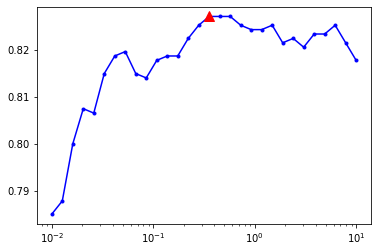

In [151]:
plt.semilogx(cspace, clf2.cv_results_['mean_test_score'], 'b.-')
plt.semilogx([clf2.best_params_['C']], clf2.best_score_,'r^', ms=10)

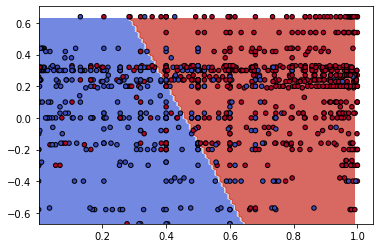

In [152]:
#plot_decision_boundary(X, y, model2, 'PriceDiff', 'LoyalCH')

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.

h=0.01
X0, X1 = X.loc[:, 'LoyalCH'], X.loc[:, 'PriceDiff']
#xx, yy = make_meshgrid(X0, X1)
X0_min, X0_max = X0.min(), X0.max()
X1_min, X1_max = X1.min(), X1.max()
xx, yy = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
    #return xx, yy
sh = xx.shape
Xplot = pd.DataFrame([X.mean(axis=0)]*sh[0]*sh[1])
Xplot['LoyalCH'] = xx.ravel()
Xplot['PriceDiff'] = yy.ravel()

Z = model2.predict(Xplot)#np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#return out

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_title(title)
#ax.legend()


(e) Compute the training and test error rates using this new value
for cost.

In [49]:
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.845
0.8111111111111111


(f) Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma.

In [153]:
#model_selection.GridSearchCV
cspace = np.logspace(-1, 2, 30)
parameters2 = {
                'C':cspace, 
                  'kernel':['rbf'],
                    'gamma': ['auto'],
              }
clf2 = model_selection.GridSearchCV(svm.SVC(), parameters2, n_jobs=8, cv=5)
clf2.fit(X=X, y=y)
model2 = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 

0.8037383177570094 {'C': 11.721022975334806, 'gamma': 'auto', 'kernel': 'rbf'}


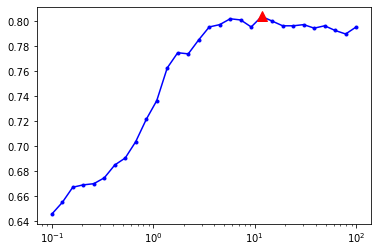

In [154]:
plt.semilogx(cspace, clf2.cv_results_['mean_test_score'], 'b.-')
plt.semilogx([clf2.best_params_['C']], clf2.best_score_,'r^', ms=10)

In [155]:
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.8725
0.8444444444444444


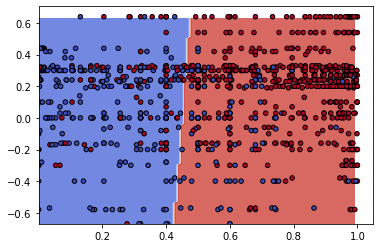

In [156]:
#plot_decision_boundary(X, y, model2, 'PriceDiff', 'LoyalCH')

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.

h=0.01
X0, X1 = X.loc[:, 'LoyalCH'], X.loc[:, 'PriceDiff']
#xx, yy = make_meshgrid(X0, X1)
X0_min, X0_max = X0.min(), X0.max()
X1_min, X1_max = X1.min(), X1.max()
xx, yy = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
    #return xx, yy
sh = xx.shape
Xplot = pd.DataFrame([X.mean(axis=0)]*sh[0]*sh[1])
Xplot['LoyalCH'] = xx.ravel()
Xplot['PriceDiff'] = yy.ravel()

Z = model2.predict(Xplot)#np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#return out

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_title(title)
#ax.legend()


(g) Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set degree = 2.

In [171]:
#model_selection.GridSearchCV
cspace = np.logspace(-3, -2.5, 50)
parameters2 = {
                'C':cspace, 
                  'kernel':['poly'],
                    'degree': [2],
                    'gamma':['auto'],
              }
clf2 = model_selection.GridSearchCV(svm.SVC(), parameters2, n_jobs=8, cv=5)
clf2.fit(X=X, y=y)
model2 = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 

0.8317757009345794 {'C': 0.0018858632787726497, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


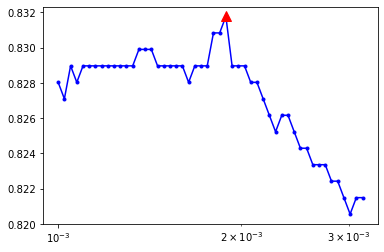

In [172]:
plt.semilogx(cspace, clf2.cv_results_['mean_test_score'], 'b.-')
plt.semilogx([clf2.best_params_['C']], clf2.best_score_,'r^', ms=10)

In [173]:
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.84625
0.8111111111111111


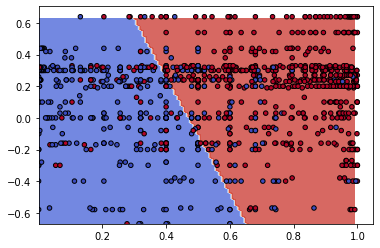

In [174]:
#plot_decision_boundary(X, y, model2, 'PriceDiff', 'LoyalCH')

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.

h=0.01
X0, X1 = X.loc[:, 'LoyalCH'], X.loc[:, 'PriceDiff']
#xx, yy = make_meshgrid(X0, X1)
X0_min, X0_max = X0.min(), X0.max()
X1_min, X1_max = X1.min(), X1.max()
xx, yy = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
    #return xx, yy
sh = xx.shape
Xplot = pd.DataFrame([X.mean(axis=0)]*sh[0]*sh[1])
Xplot['LoyalCH'] = xx.ravel()
Xplot['PriceDiff'] = yy.ravel()

Z = model2.predict(Xplot)#np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#return out

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_title(title)
#ax.legend()


(h) Overall, which approach seems to give the best results on this
data?

In [175]:
#linear kernel - 0.8111111111111111
#rbf - 0.8444444444444444
#polynomial - 0.8111111111111111

#rbf looks best; linear and polynomial are identical (does it just throw out the 2nd order?)


We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary
between them. For instance, you can do this as follows:
 x1 <- runif (500) - 0.5
 x2 <- runif (500) - 0.5
 y <- 1 * (x1^2 - x2^2 > 0)

In [280]:
import scipy.stats
from sklearn import linear_model
from sklearn import preprocessing

In [308]:

x1 = scipy.stats.uniform.rvs(size=500)-0.5
x2 = scipy.stats.uniform.rvs(size=500) - 0.5
y = ((x1**2 - 25*x1*x2**2)>0).astype('int')
X = pd.DataFrame({'x1':x1, 'x2':x2})
df = X.copy()
df['y'] = y

In [309]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, random_state=42)

(b) Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the yaxis.

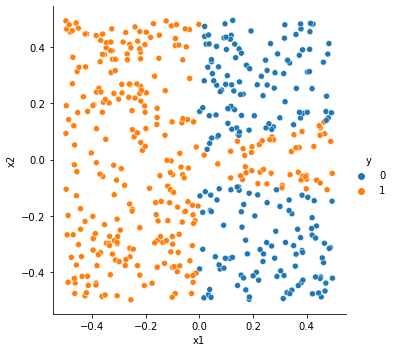

In [310]:
sns.relplot(x='x1', y='x2', hue='y', data=df)

(c) Fit a logistic regression model to the data, using X1 and X2 as
predictors.

[1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1]
[1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1
 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1

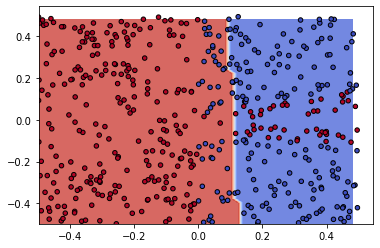

In [315]:
sc = preprocessing.StandardScaler()
X_train2 = sc.fit_transform(X_train)
log_model = linear_model.LogisticRegression().fit(X_train2, y_train)
X_test2 = sc.transform(X_test)
print(log_model.predict(X_train2))
print(log_model.predict(X_test2))
#plot_decision_boundary(X, y, model2, 'PriceDiff', 'LoyalCH')

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.

h=0.02
X0, X1 = X.loc[:, 'x1'], X.loc[:, 'x2']
#xx, yy = make_meshgrid(X0, X1)
X0_min, X0_max = X0.min(), X0.max()
X1_min, X1_max = X1.min(), X1.max()
xx, yy = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
    #return xx, yy
sh = xx.shape
Xplot = pd.DataFrame([X.mean(axis=0)]*sh[0]*sh[1])
Xplot['x1'] = xx.ravel()
Xplot['x2'] = yy.ravel()

Z = log_model.predict(sc.transform(Xplot))#np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#return out

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_title(title)
#ax.legend()



(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be linear.

(e) Now fit a logistic regression model to the data using non-linear
functions of X1 and X2 as predictors (e.g. X2
1 , X1×X2, log(X2),
and so forth).

In [326]:
sc = preprocessing.PolynomialFeatures()
Xpoly = sc.fit_transform(X)
Xpoly = pd.DataFrame(Xpoly, columns=['const', 'x1', 'x2','x1^2','x1x2', 'x2^2'])
pipelin

In [330]:
pl = pipeline.Pipeline([
    ('poly',preprocessing.PolynomialFeatures(degree=2)), 
    ('scaler', preprocessing.StandardScaler()),
    ('logistic', linear_model.LogisticRegression())
])

pl.fit(X_train, y_train)

#>>> pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
#>>> # The pipeline can be used as any other estimator
#>>> # and avoids leaking the test set into the train set
#>>> pipe.fit(X_train, y_train)
#Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
#>>> pipe.score(X_test, y_test)

0.8

In [332]:
pl.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

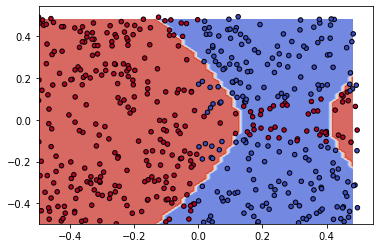

In [333]:
#plot_decision_boundary(X, y, model2, 'PriceDiff', 'LoyalCH')

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.

h=0.02
X0, X1 = X.loc[:, 'x1'], X.loc[:, 'x2']
#xx, yy = make_meshgrid(X0, X1)
X0_min, X0_max = X0.min(), X0.max()
X1_min, X1_max = X1.min(), X1.max()
xx, yy = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
    #return xx, yy
sh = xx.shape
Xplot = pd.DataFrame([X.mean(axis=0)]*sh[0]*sh[1])
Xplot['x1'] = xx.ravel()
Xplot['x2'] = yy.ravel()

Z = pl.predict(Xplot)#np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#return out

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_title(title)
#ax.legend()



(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be obviously non-linear. If it is not,
then repeat (a)-(e) until you come up with an example in which
the predicted class labels are obviously non-linear.

In [ ]:
#see above

(g) Fit a support vector classifier to the data with X1 and X2 as
predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted
class labels.

0.9880000000000001 {'C': 828.6427728546843, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


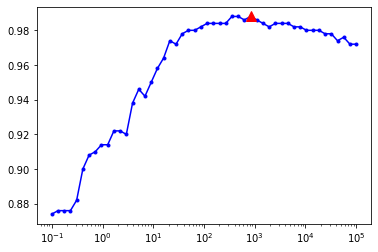

In [366]:
#pl = pipeline.Pipeline([
    #('poly',preprocessing.PolynomialFeatures(degree=2)), 
#    ('scaler', preprocessing.StandardScaler()),
#    ('svc', svm.SVC())
#]) 
#going to skip pipeline since its harder to do gridsearchcv
sc = preprocessing.StandardScaler()

X_train2 = sc.fit_transform(X_train)
X_2 = sc.transform(X)
X_test2 = sc.transform(X_test)

#model_selection.GridSearchCV
cspace = np.logspace(-1, 5, 50)
parameters2 = {
                'C':cspace, 
                'kernel':['rbf'],
                'degree': [2],
                 'gamma':['auto']
}
clf2 = model_selection.GridSearchCV(svm.SVC(), parameters2, n_jobs=8, cv=10)
clf2.fit(X=X_2, y=y)
model2 = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 
plt.semilogx(cspace, clf2.cv_results_['mean_test_score'], 'b.-')
plt.semilogx([clf2.best_params_['C']], clf2.best_score_,'r^', ms=10)

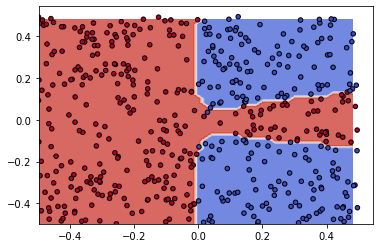

In [367]:
#plot_decision_boundary(X, y, model2, 'PriceDiff', 'LoyalCH')

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.

h=0.02
X0, X1 = X.loc[:, 'x1'], X.loc[:, 'x2']
#xx, yy = make_meshgrid(X0, X1)
X0_min, X0_max = X0.min(), X0.max()
X1_min, X1_max = X1.min(), X1.max()
xx, yy = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
    #return xx, yy
sh = xx.shape
Xplot = pd.DataFrame([X.mean(axis=0)]*sh[0]*sh[1])
Xplot['x1'] = xx.ravel()
Xplot['x2'] = yy.ravel()

Z = model2.predict(sc.transform(Xplot))#np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#return out

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_title(title)
#ax.legend()



(h) Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels.

0.9260000000000002 {'C': 10.481131341546853, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}


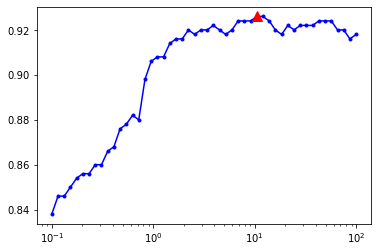

In [376]:
#pl = pipeline.Pipeline([
    #('poly',preprocessing.PolynomialFeatures(degree=2)), 
#    ('scaler', preprocessing.StandardScaler()),
#    ('svc', svm.SVC())
#]) 
#going to skip pipeline since its harder to do gridsearchcv
sc = preprocessing.StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)
X_2 = sc.transform(X)

#model_selection.GridSearchCV
cspace = np.logspace(-1, 2, 50)
parameters2 = {
                'C':cspace, 
                'kernel':['poly'],
                'degree': [3],
                 'gamma':['auto']
}
clf2 = model_selection.GridSearchCV(svm.SVC(), parameters2, n_jobs=8, cv=10)
clf2.fit(X=X_2, y=y)
model2 = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 
plt.semilogx(cspace, clf2.cv_results_['mean_test_score'], 'b.-')
plt.semilogx([clf2.best_params_['C']], clf2.best_score_,'r^', ms=10)

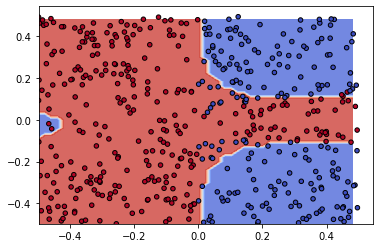

In [377]:
#plot_decision_boundary(X, y, model2, 'PriceDiff', 'LoyalCH')

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.

h=0.02
X0, X1 = X.loc[:, 'x1'], X.loc[:, 'x2']
#xx, yy = make_meshgrid(X0, X1)
X0_min, X0_max = X0.min(), X0.max()
X1_min, X1_max = X1.min(), X1.max()
xx, yy = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
    #return xx, yy
sh = xx.shape
Xplot = pd.DataFrame([X.mean(axis=0)]*sh[0]*sh[1])
Xplot['x1'] = xx.ravel()
Xplot['x2'] = yy.ravel()

Z = model2.predict(sc.transform(Xplot))#np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#return out

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#ax.set_ylabel('y label here')
#ax.set_xlabel('x label here')
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_title(title)
#ax.legend()



(i) Comment on your results.

In [378]:
#SVC radial seems to do the best job; at nearly 98% cross validation error!
# second up is the svc polynomial, but it does get a weird behavior on one side
#Logistic got around 80% when i had added the X*2 and cross terms, but failed at getting part of the cover.